### 05. Radiance to reflectance conversion using 1-point ELM: Pininj
#### Gayantha R. L. Kodikara, 13/09/2023 @ UWM Update 08/03/2024

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from osgeo import gdal

In [2]:
# ReferenceImage has five colums and five rows. Five columns are WL(Band wavelength), MBP(Mean Black-Panel),
# MWP(Mean White-Panel). Rows indicate B1,B2,B3,B4,and B5 Bands.
RadiancePanel = np.load('RadiancePanelMean.npy')
RadiancePanel

array([[4.75000000e+02, 3.27333330e-02, 8.59999980e-02],
       [5.60000000e+02, 3.59200003e-02, 1.26666663e-01],
       [6.68000000e+02, 3.41199997e-02, 1.27639994e-01],
       [8.40000000e+02, 6.64133355e-02, 1.01653325e-01],
       [7.17000000e+02, 3.06266670e-02, 1.10653336e-01]])

In [3]:
RadiancePanel[:,1] = 0
RadiancePanel

array([[4.75000000e+02, 0.00000000e+00, 8.59999980e-02],
       [5.60000000e+02, 0.00000000e+00, 1.26666663e-01],
       [6.68000000e+02, 0.00000000e+00, 1.27639994e-01],
       [8.40000000e+02, 0.00000000e+00, 1.01653325e-01],
       [7.17000000e+02, 0.00000000e+00, 1.10653336e-01]])

In [4]:
# ReferenceImage has two colums and five rows. Two columns are WL (Wavelength), MBS(Mean Black-Spectra)and 
# MWS(Mean White-Spectra). Rows indicate B1,B2,B3,B4,and B5 Bands.
ReflectancePanel = np.load('ReflectancePanel.npy')
ReflectancePanel

array([[4.75000000e+02, 4.66712279e-02, 5.44809479e-01],
       [5.60000000e+02, 4.31325030e-02, 5.22613797e-01],
       [6.68000000e+02, 4.46042925e-02, 5.41990936e-01],
       [8.40000000e+02, 2.11278479e-01, 5.56544852e-01],
       [7.17000000e+02, 5.26647139e-02, 5.46061179e-01]])

In [5]:
ReflectancePanel[:,1] = 0
ReflectancePanel

array([[4.75000000e+02, 0.00000000e+00, 5.44809479e-01],
       [5.60000000e+02, 0.00000000e+00, 5.22613797e-01],
       [6.68000000e+02, 0.00000000e+00, 5.41990936e-01],
       [8.40000000e+02, 0.00000000e+00, 5.56544852e-01],
       [7.17000000e+02, 0.00000000e+00, 5.46061179e-01]])

In [6]:
Combine = np.hstack((RadiancePanel,ReflectancePanel[:,1:3]))
Combine.shape

(5, 5)

In [7]:
# Combine 2d array contain, Columns: WL,MBP,MWP,MBS,MWS. Rows: B1,B2,B3,B4, and B5
Combine

array([[4.75000000e+02, 0.00000000e+00, 8.59999980e-02, 0.00000000e+00,
        5.44809479e-01],
       [5.60000000e+02, 0.00000000e+00, 1.26666663e-01, 0.00000000e+00,
        5.22613797e-01],
       [6.68000000e+02, 0.00000000e+00, 1.27639994e-01, 0.00000000e+00,
        5.41990936e-01],
       [8.40000000e+02, 0.00000000e+00, 1.01653325e-01, 0.00000000e+00,
        5.56544852e-01],
       [7.17000000e+02, 0.00000000e+00, 1.10653336e-01, 0.00000000e+00,
        5.46061179e-01]])

In [8]:
# Correction factor for Band 1
Bx1 = np.polyfit(Combine[0,1:3], Combine[0,3:5],1)
Bx1P = np.poly1d(Bx1)
Bx1P

poly1d([6.3349941, 0.       ])

In [9]:
# Correction factor for Band 2
Bx2 = np.polyfit(Combine[1,1:3], Combine[1,3:5],1)
Bx2P = np.poly1d(Bx2)
Bx2P

poly1d([4.12589853, 0.        ])

In [10]:
# Correction factor for Band 3
Bx3 = np.polyfit(Combine[2,1:3], Combine[2,3:5],1)
Bx3P = np.poly1d(Bx3)
Bx3P

poly1d([4.24624695, 0.        ])

In [11]:
# Correction factor for Band 4
Bx4 = np.polyfit(Combine[3,1:3], Combine[3,3:5],1)
Bx4P = np.poly1d(Bx4)
Bx4P

poly1d([5.47493013e+00, 7.85046229e-17])

In [12]:
# Correction factor for Band 5
Bx5 = np.polyfit(Combine[4,1:3], Combine[4,3:5],1)
Bx5P = np.poly1d(Bx5)
Bx5P

poly1d([4.93488221, 0.        ])

In [13]:
BWP_Ref = np.vstack((Bx1,Bx2,Bx3,Bx4,Bx5))
np.save('Pininj_0177_1pELM_coeff.npy',BWP_Ref)
BWP_Ref

array([[6.33499410e+00, 0.00000000e+00],
       [4.12589853e+00, 0.00000000e+00],
       [4.24624695e+00, 0.00000000e+00],
       [5.47493013e+00, 7.85046229e-17],
       [4.93488221e+00, 0.00000000e+00]])

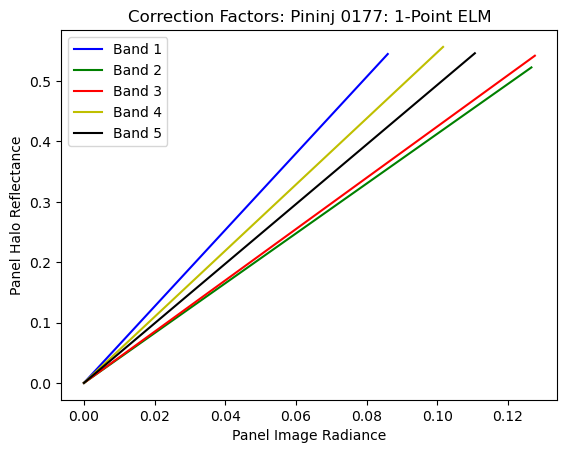

In [14]:
#Plot all the trend lines in one plot
#plt.scatter(Combine[0,3:5],Combine[0,1:3], color = 'r')
plt.plot(Combine[0,1:3],Bx1P(Combine[0,1:3]), color = 'b', label = 'Band 1')
plt.plot(Combine[1,1:3],Bx2P(Combine[1,1:3]), color = 'g', label = 'Band 2')
plt.plot(Combine[2,1:3],Bx3P(Combine[2,1:3]), color = 'r', label = 'Band 3')
plt.plot(Combine[3,1:3],Bx4P(Combine[3,1:3]), color = 'y', label = 'Band 4')
plt.plot(Combine[4,1:3],Bx5P(Combine[4,1:3]), color = 'k', label = 'Band 5')
plt.xlabel('Panel Image Radiance')
plt.ylabel('Panel Halo Reflectance')
plt.title('Correction Factors: Pininj 0177: 1-Point ELM')
plt.legend()
plt.savefig('Pininj_0177_1pELM_coeff.png', dpi = 300)
plt.show()

In [15]:
# Load the image
Radiance = np.load('np3DRadiance.npy')
Radiance.shape

(900, 1200, 5)

In [16]:
# Create empty image
Reflectance = np.zeros((900,1200,5))
Reflectance.shape

(900, 1200, 5)

In [17]:
# Radiance to Reflectance = Panel Reflectance / Mean Radiance
Reflectance[:,:,0] = (Radiance[:,:,0] * Bx1[0]) + Bx1[1]
Reflectance[:,:,1] = (Radiance[:,:,1] * Bx2[0]) + Bx2[1]
Reflectance[:,:,2] = (Radiance[:,:,2] * Bx3[0]) + Bx3[1]
Reflectance[:,:,3] = (Radiance[:,:,3] * Bx4[0]) + Bx4[1]
Reflectance[:,:,4] = (Radiance[:,:,4] * Bx5[0]) + Bx5[1]
np.save('Pininj_0177_1pELM_np3D.npy',Reflectance)

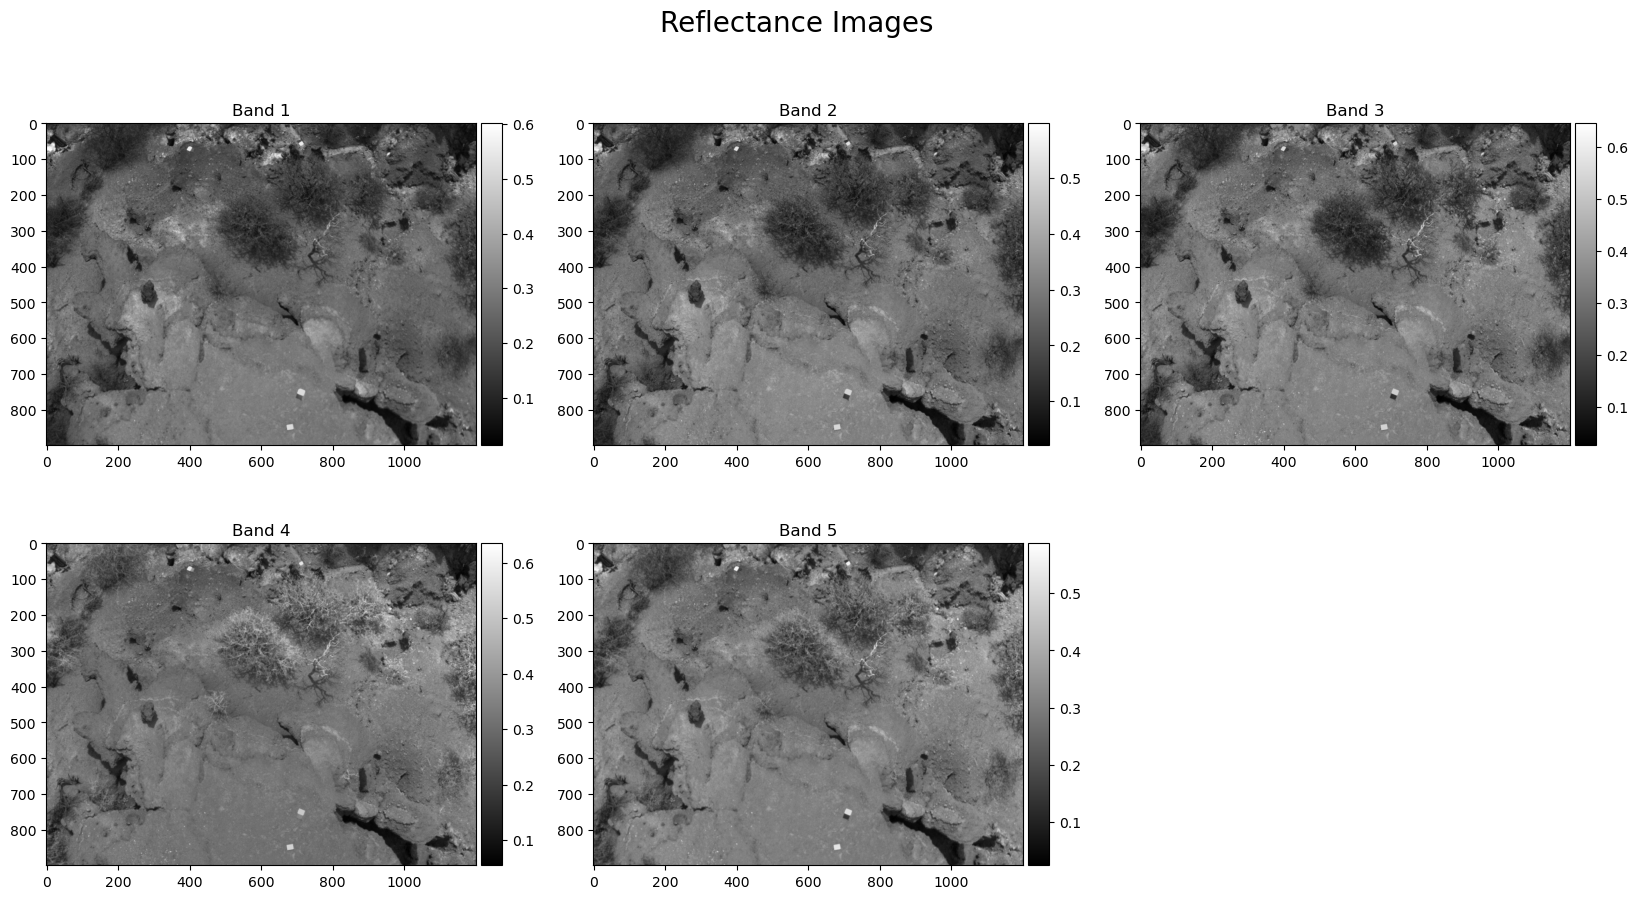

In [18]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(Reflectance[:,:,0], cmap='gray')
im2 = ax2.imshow(Reflectance[:,:,1], cmap='gray')
im3 = ax3.imshow(Reflectance[:,:,2], cmap='gray')
im4 = ax4.imshow(Reflectance[:,:,3], cmap='gray')
im5 = ax5.imshow(Reflectance[:,:,4], cmap='gray')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Reflectance Images', fontsize=20)
plt.show()

In [19]:
def array2geotif(array, out_path):  
    nrows, ncols, nbands = array.shape
    driver = gdal.GetDriverByName('GTiff')
    dataset = driver.Create(out_path, ncols, nrows, nbands, gdal.GDT_Float32)
    for i in range(nbands):
        dataset.GetRasterBand(i+1).WriteArray(array[:,:,i])
    #dataset.SetGeoTransform(gt)
    #dataset.SetProjection(prj)
    dataset.FlushCache()
    dataset = None

In [20]:
array2geotif(Reflectance, 'Pininj_0177_1pELM_Ref.tif')

/home/kodi/.local/lib/python3.9/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [21]:
# Goto next step if you are further interested.... ;-)